# **SPRINT 1 - Preparação dos Dados**

Nesta etapa do projeto vamos carregar os dados, efetuar o tratamento necessário e iniciar a análise exploratória.

In [1]:
# Importação das bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.simplefilter(action='ignore')

## **Coleta dos Dados**

In [2]:
# Carregar os dados
df_sono = pd.read_csv('../datasets/Estudo_Sono_Segurados_SAFE.csv')

# Visualizar as primeiras linhas
df_sono.head()

,ID,sexo,idade,ocupacao,horas_de_sono,qualidade_do_sono,nivel_atividade_fisica,nivel_stress,categoria_IMC,pressao_sanguinea,frequencia_cardiaca,passos_diarios,disturbio_do_sono
0,1,Masculino,27,Engenheiro de Software,"6,1",6,42,6,Sobrepeso,126/83,77,4200,NaN
1,2,Masculino,28,Médico,"6,2",6,60,8,Normal,125/80,75,10000,NaN
2,3,Masculino,28,Médico,"6,2",6,60,8,Normal,125/80,75,10000,NaN
3,4,Masculino,28,Representante de Vendas,"5,9",4,30,8,Obeso,140/90,85,3000,Apneia do Sono
4,5,Masculino,28,Representante de Vendas,"5,9",4,30,8,Obeso,140/90,85,3000,Apneia do Sono


In [3]:
# Visualizar o formato(shape) dos dados:
print(f'Número de registros: {df_sono.shape[0]}\nNúmero de variáveis: {df_sono.shape[1]}')

Número de registros: 374
Número de variáveis: 13


Explicando as variáveis dos dados:

| Variável              | Descrição                                                             |
|-----------------------|-----------------------------------------------------------------------|
| ID                    | Um número de identificação exclusivo para cada voluntário.           |
| sexo                  | O gênero do voluntário (Masculino/Feminino).                         |
| idade                 | A idade de cada participante no início do estudo.                   |
| ocupação              | A ocupação ou profissão do segurado.                                 |
| horas_de_sono         | O tempo médio de sono (em horas) por noite.                         |
| qualidade_do_sono     | Uma pontuação subjetiva de 0 a 10, indicando a qualidade percebida do sono. |
| nivel_atividade_fisica | Uma categoria que reflete o nível de atividade física.               |
| nivel_stress          | Uma classificação subjetiva em uma escala de 1 a 10.                 |
| categoria_IMC         | Uma medida da composição corporal.                                  |
| pressao_sanguinea     | Indicada como pressão sistólica sobre pressão diastólica.           |
| frequencia_cardiaca   | Em batimentos por minuto.                                           |
| passos_diários        | Número de passos diários do voluntário.                              |
| disturbio_do_sono     | Um dos seguintes - Nenhum, Insônia ou Apneia do Sono.                |



## **Análise e Tratamento dos Dados**

In [4]:
# Vendo informações e formato dos dados:
df_sono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      374 non-null    int64 
 1   sexo                    374 non-null    object
 2   idade                   374 non-null    int64 
 3   ocupacao                374 non-null    object
 4   horas_de_sono           374 non-null    object
 5   qualidade_do_sono       374 non-null    int64 
 6   nivel_atividade_fisica  374 non-null    int64 
 7   nivel_stress            374 non-null    int64 
 8   categoria_IMC           374 non-null    object
 9   pressao_sanguinea       374 non-null    object
 10  frequencia_cardiaca     374 non-null    int64 
 11  passos_diarios          374 non-null    int64 
 12  disturbio_do_sono       155 non-null    object
dtypes: int64(7), object(6)
memory usage: 38.1+ KB


Pontos de atenção:
* horas_de_sono: esta com dtype incorreto;
* disturbio_do_sono: Possui dados ausentes ou nulos.

Para a variável horas_de_sono, os decimais estão separados por vírgula, por isso foi identificado como object. Abaixo vamos efetuar a correção:

In [5]:
# Vamos substituir a ',' por '.' e em seguida alterar o tipo para float
df_sono['horas_de_sono'] = df_sono['horas_de_sono'].str.replace(',','.').astype('float')

In [6]:
# Confirmando a alteração:
df_sono['horas_de_sono'].dtype

dtype('float64')

Verificando dados ausentes:

In [7]:
print(f'Número de registros com dados ausentes:\n{df_sono.isna().sum()}')

Número de registros com dados ausentes:
ID                          0
sexo                        0
idade                       0
ocupacao                    0
horas_de_sono               0
qualidade_do_sono           0
nivel_atividade_fisica      0
nivel_stress                0
categoria_IMC               0
pressao_sanguinea           0
frequencia_cardiaca         0
passos_diarios              0
disturbio_do_sono         219
dtype: int64


In [8]:
# Verificando os valores contidos na variável:
df_sono['disturbio_do_sono'].value_counts()

disturbio_do_sono
Apneia do Sono    78
Insônia           77
Name: count, dtype: int64

Conforme descrito no início, essa variável deve ter três disturbios (Nenhum, Apneia, Insônia).

Ao carregar os dados, a categoria "Nenhum" foi assumido como um dado ausente. Vamos corrigir logo abaixo:

In [9]:
# Corrigindo os dados ausentes da coluna disturbio do sono:
df_sono['disturbio_do_sono'].fillna('Nenhum', inplace=True)

In [10]:
# Verificando a correção:
df_sono['disturbio_do_sono'].value_counts()

disturbio_do_sono
Nenhum            219
Apneia do Sono     78
Insônia            77
Name: count, dtype: int64

Para auxiliar na análise exploratória, acredito ser interessante criar uma variável para informar se o voluntário possui ou não um distúrbio do sono.

In [11]:
df_sono['tem_disturbio_do_sono'] = df_sono['disturbio_do_sono'].isin(['Apneia do Sono', 'Insônia'])

In [12]:
# Visualizando novamente as informações das variáveis
df_sono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      374 non-null    int64  
 1   sexo                    374 non-null    object 
 2   idade                   374 non-null    int64  
 3   ocupacao                374 non-null    object 
 4   horas_de_sono           374 non-null    float64
 5   qualidade_do_sono       374 non-null    int64  
 6   nivel_atividade_fisica  374 non-null    int64  
 7   nivel_stress            374 non-null    int64  
 8   categoria_IMC           374 non-null    object 
 9   pressao_sanguinea       374 non-null    object 
 10  frequencia_cardiaca     374 non-null    int64  
 11  passos_diarios          374 non-null    int64  
 12  disturbio_do_sono       374 non-null    object 
 13  tem_disturbio_do_sono   374 non-null    bool   
dtypes: bool(1), float64(1), int64(7), object(5

In [25]:
# Salvando o csv tratado para utilização posterior
df_sono.to_csv('../datasets/estudo_sono_tratado.csv', index=False)

## **Análise Exploratória**

Agora que fizemos as regularizações dos dados, está na hora de explora-los e tentar encontrar alguns insights neles.

### **Verificando as estatísticas descritivas das variáveis numéricas**

In [14]:
# Visualizar estatística descritivas dos dados
df_sono.describe()

,ID,idade,horas_de_sono,qualidade_do_sono,nivel_atividade_fisica,nivel_stress,frequencia_cardiaca,passos_diarios
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### **Verificando descrições de dados não numéricos**

In [15]:
df_sono.describe(include=['object','bool'])

,sexo,ocupacao,categoria_IMC,pressao_sanguinea,disturbio_do_sono,tem_disturbio_do_sono
count,374,374,374,374,374,374
unique,2,11,4,25,3,2
top,Masculino,Enfermeiro(a),Normal,130/85,Nenhum,False
freq,189,73,195,99,219,219


### **Visualizando a distribuição de idades e horas de sono**

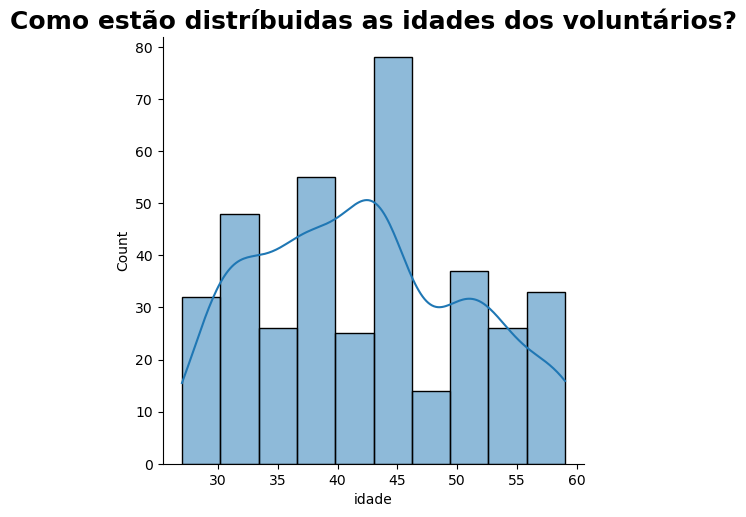

In [16]:
sns.displot(data=df_sono, x='idade', kde=True)
plt.title('Como estão distríbuidas as idades dos voluntários?', fontsize=18, weight='bold')
plt.show()

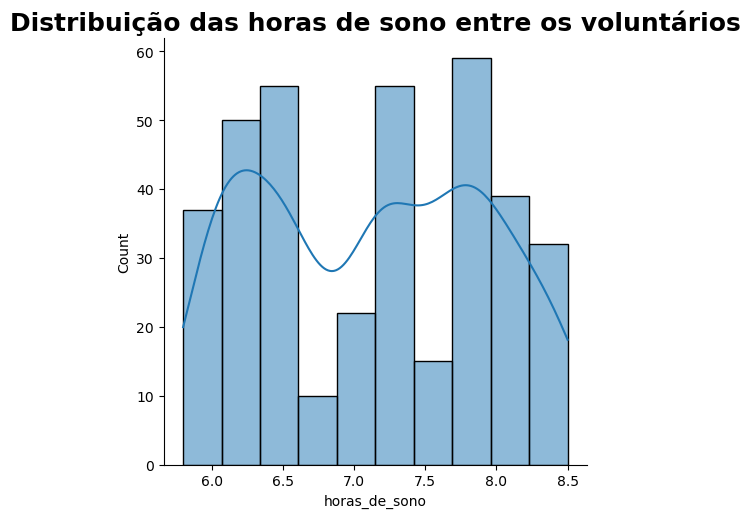

In [17]:
sns.displot(data=df_sono, x='horas_de_sono', kde=True)
plt.title('Distribuição das horas de sono entre os voluntários', 
          fontsize=18, weight='bold')
plt.show()

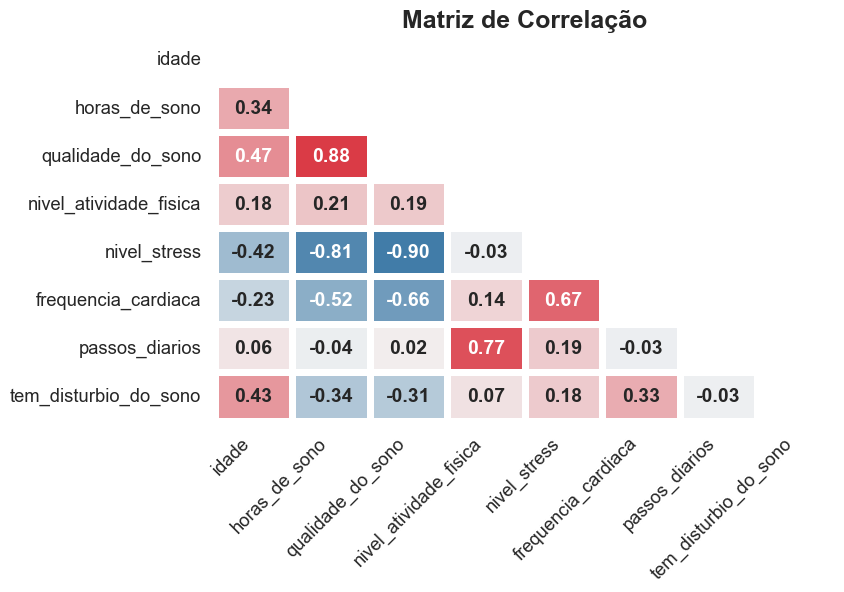

In [18]:
# Excluir a coluna 'ID' para que ela não entre na correlação
df_sono_sem_id = df_sono.drop(columns=['ID'])

# Criar a matriz de correlação em forma de triângulo
correlacao = df_sono_sem_id.corr(numeric_only=True)

# Criar um heatmap 
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)  # Ajuste o tamanho da fonte
cmap = sns.diverging_palette(240, 10, as_cmap=True)
# Criar uma mascara para o heatmap mostrar apenas a parte inferior do sem dados repetidos
mask = np.triu(np.ones(correlacao.shape), k=0).astype(bool)
ax = sns.heatmap(correlacao, annot=True, fmt='.2f', cmap=cmap, mask=mask, linewidths=5, annot_kws={"size": 14, "weight":"bold"}, cbar=False)
ax.set_facecolor('white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Matriz de Correlação', fontsize=18, weight='bold')
plt.show()

A Matriz de Correlação impressa acima nos trouxe informações interessantes:

* Quem tem mais horas de sono, tem uma qualidade de sono melhor;
* Pessoas com mais nível de stress, também tem maior frequência cardíaca;
* Pessoas com mais horas e com melhor qualidade de sono, são menos estressadas.

### **Pessoas que dormem mais, dormem melhor?**

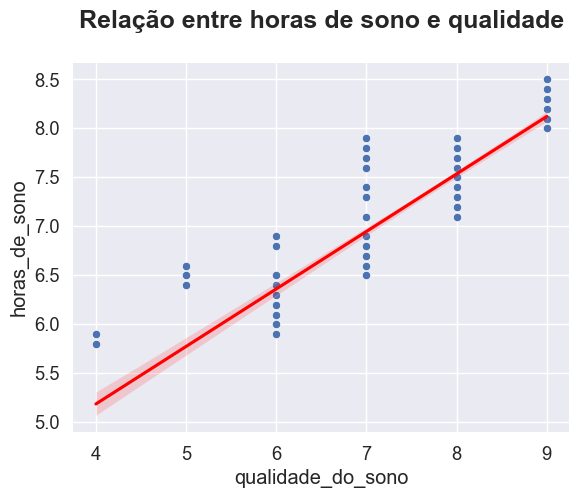

In [19]:
sns.set_style('darkgrid')
sns.scatterplot(data=df_sono, y='horas_de_sono', x='qualidade_do_sono')
sns.regplot(data=df_sono, x='qualidade_do_sono', y='horas_de_sono', color='red', scatter=False)
sns.despine(left=True, bottom=True)
plt.title('Relação entre horas de sono e qualidade', fontsize=18, weight='bold', pad=25)
plt.show()

### **Existe relação entre o nivel de stress e a frequencia cardiaca?**

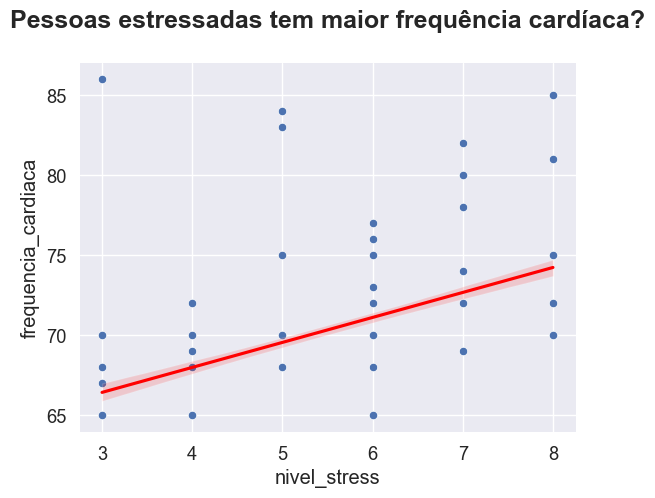

In [20]:
sns.set_style('darkgrid')
sns.scatterplot(data=df_sono, x = 'nivel_stress', y='frequencia_cardiaca')
sns.regplot(data=df_sono, x='nivel_stress', y='frequencia_cardiaca', color='red', scatter=False)
plt.title('Pessoas estressadas tem maior frequência cardíaca?', fontsize=18, weight='bold', pad=25)
sns.despine(left=True, bottom=True)
plt.show()

### **Pessoas que dormem mais, são menos estressadas?**

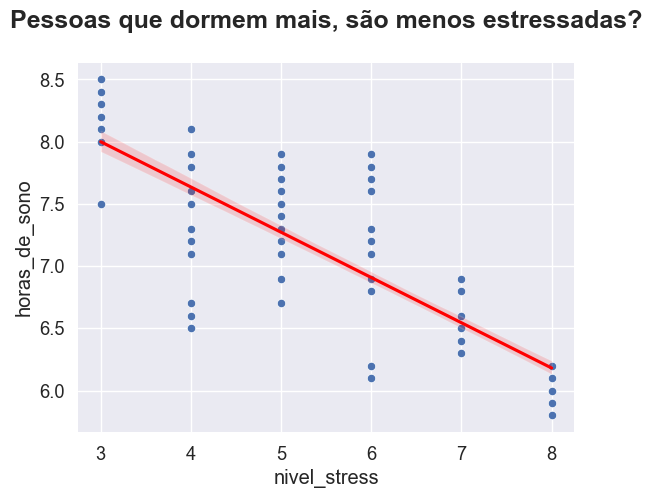

In [21]:
sns.set_style('darkgrid')
sns.scatterplot(data=df_sono, x = 'nivel_stress', y='horas_de_sono')
sns.regplot(data=df_sono, x='nivel_stress', y='horas_de_sono', color='red', scatter=False)
plt.title('Pessoas que dormem mais, são menos estressadas?', fontsize=18, weight='bold', pad=25)
sns.despine(left=True, bottom=True)
plt.show()


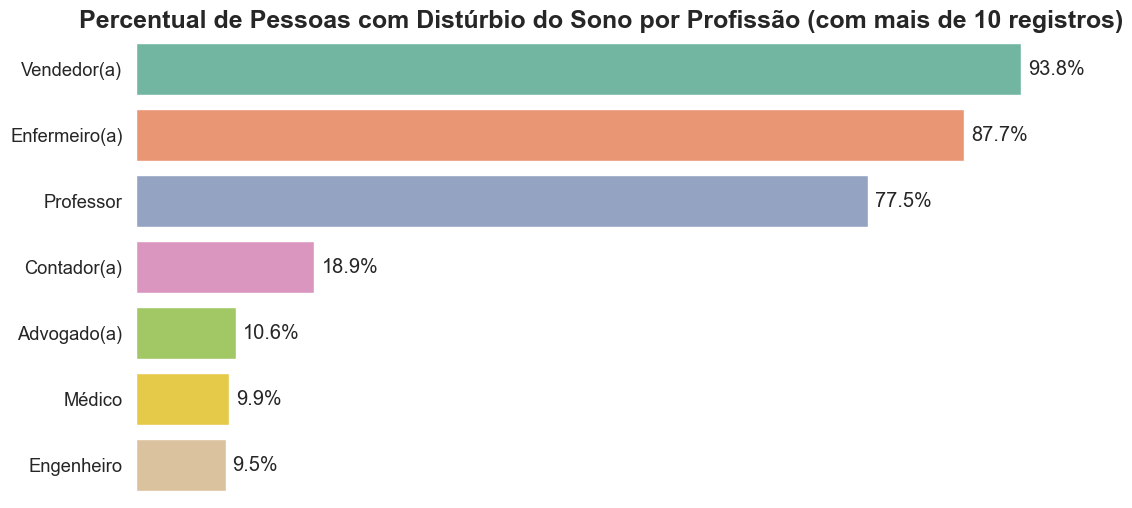

In [22]:
#Contar as pessoas com distúrbio do sono para cada profissão
disturbio_por_profissao = df_sono.groupby(['ocupacao'])['tem_disturbio_do_sono'].sum().reset_index()

# Calcular percentual em relação ao número total de pessoas de cada profissão
total_por_profissao = df_sono['ocupacao'].value_counts().reset_index()
total_por_profissao.columns = ['ocupacao', 'total']

# Filtrar profissões com mais de 10 registros
total_por_profissao_filtrado = total_por_profissao[total_por_profissao['total']>10]

# Combinar os DataFrames de distúrbio por profissão e total por profissão filtrado
disturbio_por_profissao = disturbio_por_profissao.merge(total_por_profissao_filtrado, on='ocupacao')
disturbio_por_profissao['percentual'] = (disturbio_por_profissao['tem_disturbio_do_sono'] / disturbio_por_profissao['total']) * 100

# Criar ordenação para a plotagem
disturbio_por_profissao = disturbio_por_profissao.sort_values(by='percentual', ascending=False)

# Criar visualização
sns.set_style('white')
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura conforme necessário
ax = sns.barplot(data=disturbio_por_profissao, y='ocupacao', x='percentual', palette='Set2', order=disturbio_por_profissao['ocupacao'])
plt.bar_label(ax.containers[0], fmt='%.1f%%', padding=5)  # Defina o formato para uma casa decimal
sns.despine(left=True, bottom=True)
ax.set(xticklabels=[],xlabel='', ylabel='')
plt.title('Percentual de Pessoas com Distúrbio do Sono por Profissão (com mais de 10 registros)',
         fontsize=18, weight='bold')
plt.show()


### **Qual sexo sofre mais distúrbios do sono?**

Antes de responder essa questão, vamos verificar como esta distribuído os voluntários por sexo:

In [23]:
df_sono['sexo'].value_counts()

sexo
Masculino    189
Feminino     185
Name: count, dtype: int64

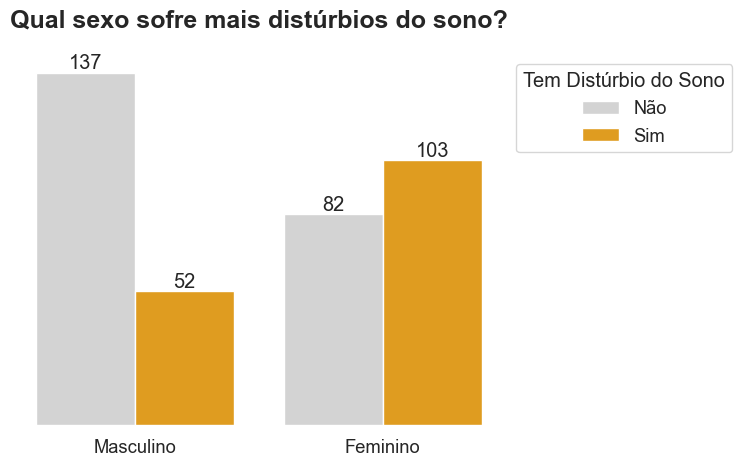

In [24]:
# Criar grafico de contagem de valores:
ax = sns.countplot(data=df_sono, x='sexo', hue='tem_disturbio_do_sono', palette={0: "lightgray", 1: "orange"})
ax.set(xlabel='', ylabel='', yticklabels=[])
for i in range(2):
    plt.bar_label(ax.containers[i])
sns.despine(left=True, bottom=True)
plt.title('Qual sexo sofre mais distúrbios do sono?', fontsize=18, weight='bold', pad=20)
ax.legend(title="Tem Distúrbio do Sono", bbox_to_anchor=(1, 1), loc='upper left', labels=["Não", "Sim"])

plt.show()

## **Conclusões**

Neste primeiro Sprint destaco a importância de se fazer uma análise inicial nos dados. 

Vimos que foi necessário correção de variáveis como horas_de_sono e “distúrbio_do_sono” afim de garantir uma análise correta dos dados.

Após a análise exploratória obtivemos informações interessantes:
- Sim! Quem dorme mais, dorme melhor;
- E Sim! Quem dorme mais, dorme melhor e é menos estressado.
- Vendedores, enfermeiros e professores são as profissões que mais apresentaram distúrbios de sono;
- Mulheres apresentaram mais distúrbios do sono do que os homens.
